# Example of masks

## Creating an instance 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffractio import np
from diffractio import degrees, mm, um
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

from numpy import loadtxt

## mask from two functions

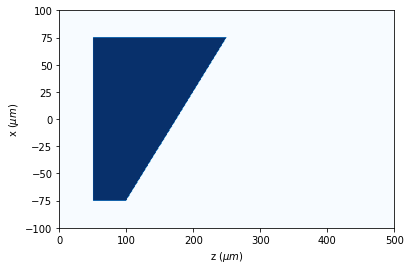

In [3]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 500 * um, 512)
wavelength = 0.6238 * um

f1 = "50*um"
f2 = "175*um+np.tan(45*degrees)*(self.X-0*um)"
z_sides = (-75 * um, 75 * um)
v_globals = {"um": 1, "np": np}

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.mask_from_function(
    r0=(0 * um, 0 * um),
    refractive_index=1.5,
    f1=f1,
    f2=f2,
    z_sides=z_sides,
    angle=0 * degrees,
    v_globals=v_globals,
)

t1.draw_refractive_index()

## mask from surfaces defined in .txt file

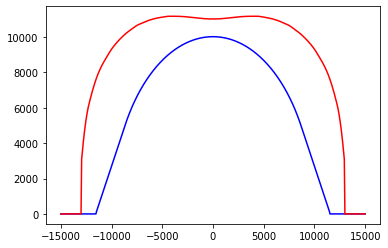

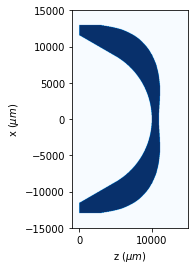

In [4]:
x = np.linspace(-15 * mm, 15 * mm, 512)
z = np.linspace(-1 * mm, 15 * mm, 512)
wavelength = 0.6328 * um

t1 = Scalar_mask_XZ(x, z, wavelength)

profile1 = loadtxt("./profile1.txt")
profile2 = loadtxt("./profile2.txt")

profile1[:, 1] = np.abs(profile1[:, 1])
profile2[:, 1] = np.abs(profile2[:, 1])
t1.mask_from_array(
    r0=(0 * um, 0 * um),
    refractive_index=2,
    array1=profile2 * 1000,  # propasar a micras
    array2=profile1 * 1000,  # pasar a micras
    x_sides=(-15 * mm, 15 * mm),
    angle=0 * degrees,
    v_globals={},
    interp_kind="quadratic",
    has_draw=True,
)

t1.draw_refractive_index(draw_borders=False, scale="scaled")

## mask from surfaces defined in .dxf file

<Figure size 512x256 with 0 Axes>

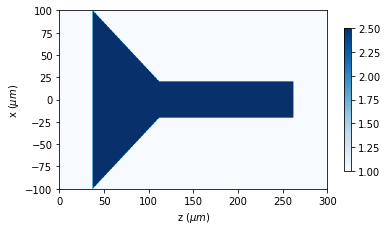

In [5]:
wavelength = 0.6328 * um

filename_dxf = "hatch_polyline2.dxf"

t0 = Scalar_mask_XZ(x=None, z=None, wavelength=wavelength)
t0.dxf(
    filename_dxf,
    n_max=2.5,
    n_min=1,
    num_pixels=(512, 256),
    units="um",
    invert=False,
    verbose=False,
)
t0.draw_refractive_index(scale="scaled", colorbar_kind="vertical")

## mask from several surfaces

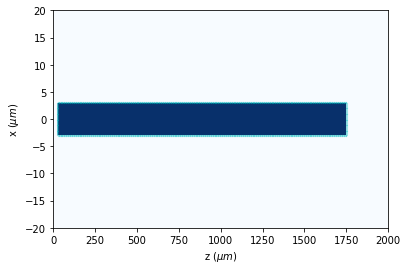

In [6]:
x0 = np.linspace(-20 * um, 20 * um, 256)
z0 = np.linspace(0 * um, 2000 * um, 512)
wavelength = 2 * um

r0 = (0 * um, 0 * um)
refractive_index = 4
Fs = ["Xrot<3*um", "Xrot>-3*um", "Zrot>25*um", "Zrot<1750*um"]
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t1.object_by_surfaces(r0, refractive_index, Fs, angle=0 * degrees, v_globals={})

t1.draw_refractive_index(draw_borders=True)

## refractive index from functions

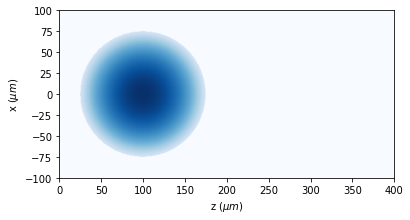

In [7]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 400 * um, 512)

wavelength = 0.5 * um

t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)

pn = dict(n_out=1.5, n_center=4, cx=0 * um, cz=100 * um, radius=75 * um)

center = (pn["cx"], pn["cz"])
radius = pn["radius"]
# ref_index = '2*(((X-0)**2+(Z-300)**2)/75**2-0)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn
)

t0.cylinder(r0=center, radius=(radius, radius), refractive_index=ref_index, angle=0)

t0.draw_refractive_index(draw_borders=False, scale="scaled")

## xz mask from a x mask

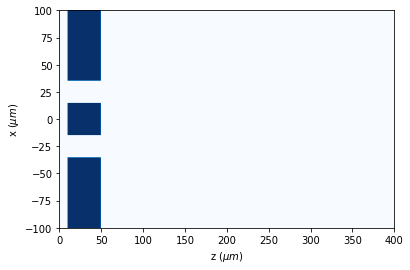

In [8]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 0.55 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
z0 = 10 * um
z1 = 50 * um

v_globals = dict(z0=z0, z1=z1)

t1.extrude_mask(t=t0, z0=z0, z1=z1, refractive_index=1.5, v_globals=v_globals)

t1.draw_refractive_index(draw_borders=False)

## xz mask from a xy mask

There are many masks defined in the XY frame. We can use them using the 'refractive_index_from_scalar_mask_XY' method.

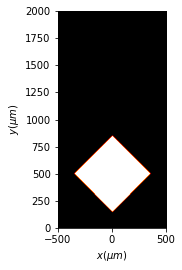

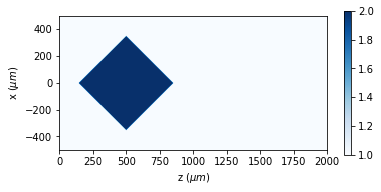

In [9]:
from diffractio.scalar_masks_XY import Scalar_mask_XY

x = np.linspace(-500 * um, 500 * um, 256)
y = z = np.linspace(0 * um, 2 * mm, 512)

wavelength = 0.6328 * um

mask_xy = Scalar_mask_XY(x, y, wavelength)
mask_xy.square(r0=(0, 500 * um), size=500 * um, angle=45 * degrees)
mask_xy.draw()

mask_xz = Scalar_mask_XZ(x, z, wavelength=wavelength, n_background=1)
mask_xz.refractive_index_from_scalar_mask_XY(mask_xy, 2 + 0.02j)
mask_xz.draw_refractive_index(
    draw_borders=False, scale="scaled", colorbar_kind="vertical"
)

## Variable refractive index

### z direction

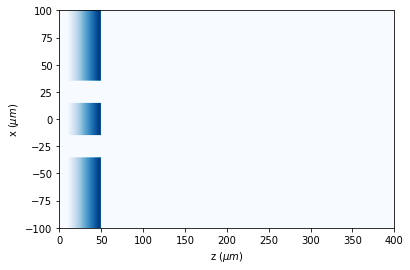

In [10]:
# In this example the variation is in z

x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 0.55 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
z0 = 10 * um
z1 = 50 * um
v_globals = dict(z0=z0, z1=z1)
t1.extrude_mask(
    t=t0, z0=z0, z1=z1, refractive_index="1+0.25*(z-z0)/(z1-z0)", v_globals=v_globals
)
t1.draw_refractive_index(
    draw_borders=False,
)

### x direction

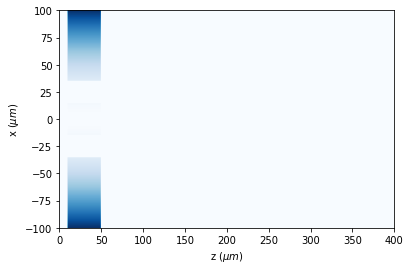

In [11]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 0.5 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

z_min = 10 * um
z_max = 50 * um
v_globals = dict(np=np)
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
t1.extrude_mask(
    t=t0,
    z0=z_min,
    z1=z_max,
    refractive_index="1+0.25*np.abs(x/200)**2",
    v_globals=v_globals,
)
t1.draw_refractive_index(draw_borders=False)

### discretize_refractive_index

Dx=0.78 um


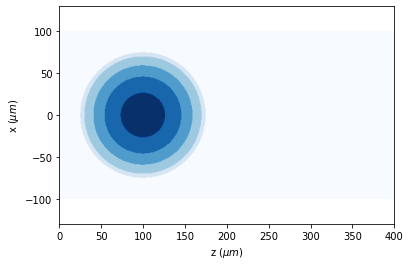

In [12]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 50 * um

print("Dx={:2.2f} um".format(x0[1] - x0[0]))

t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)

pn = dict(n_out=1.5, n_center=4, cx=0 * um, cz=100 * um, radius=75 * um)

center = (pn["cx"], pn["cz"])
radius = pn["radius"]
# ref_index = '2*(((X-0)**2+(Z-300)**2)/75**2-0)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn
)

t0.cylinder(r0=center, radius=(radius, radius), refractive_index=ref_index, angle=0)

t0.discretize_refractive_index(num_layers=5)

t0.draw_refractive_index(draw_borders=False, scale="equal")

## add_masks
Complex structures can be performed by adding different masks.

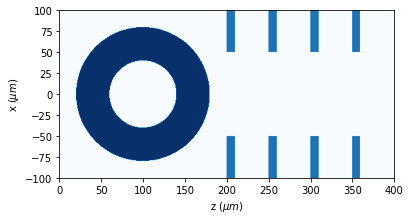

In [13]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 2 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t1.cylinder(r0=(0, 100 * um), radius=(80 * um, 80 * um), refractive_index=2.5, angle=0)

t1.cylinder(r0=(0, 100 * um), radius=(40 * um, 40 * um), refractive_index=1, angle=0)

for pos_slit in [200, 250, 300, 350]:
    t1.slit(
        r0=(0 * um, pos_slit * um),
        aperture=100 * um,
        depth=10 * um,
        refractive_index=1.5 - 1.5j,
        refractive_index_center="",
        angle=0 * degrees,
    )

t1.draw_refractive_index(draw_borders=False, scale="scaled")

## mask from an image

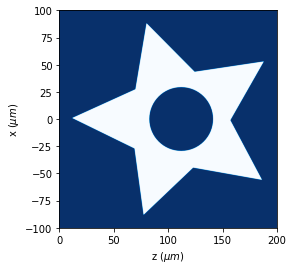

In [14]:
# TODO: change size of image to any desired.

x0 = np.linspace(-100 * um, 100 * um, 1024)
z0 = np.linspace(0 * um, 200 * um, 1024)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

filename = "star_hole.png"
t1.image(filename=filename, n_max=2, n_min=1, angle=0 * degrees, invert=False)
t1.draw_refractive_index(scale="scaled")

# Definite masks

## semi plane

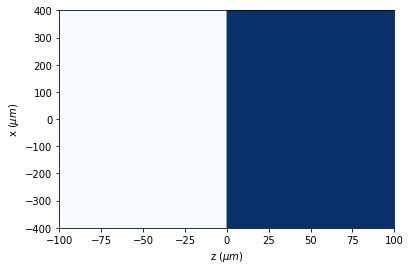

In [15]:
x0 = np.linspace(-400 * um, 400 * um, 256)
z0 = np.linspace(-100 * um, 100 * um, 512)
wavelength = 0.5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.semi_plane(
    r0=(0 * um, 0 * um), refractive_index=2, angle=0 * degrees, rotation_point=None
)
t1.draw_refractive_index()

## layer

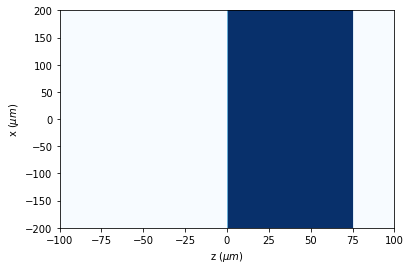

In [16]:
x0 = np.linspace(-200 * um, 200 * um, 256)
z0 = np.linspace(-100 * um, 100 * um, 512)
wavelength = 0.5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.layer(
    r0=(50 * um, 0 * um),
    depth=75 * um,
    refractive_index=2,
    angle=0 * degrees,
    rotation_point=None,
)
t1.draw_refractive_index()

## rectangle

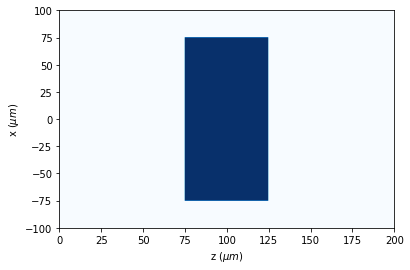

In [17]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.rectangle(
    r0=(0 * um, 100 * um),
    size=(150 * um, 50 * um),
    angle=0 * degrees,
    refractive_index=1.5,
)
t1.draw_refractive_index()

## slit

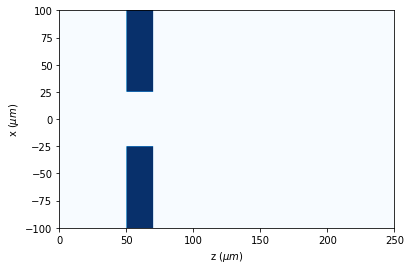

In [18]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 250 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.slit(
    r0=(0 * um, 50 * um),
    aperture=50 * um,
    depth=20 * um,
    refractive_index=1.5 + 1j,
    refractive_index_center="",
    angle=0 * degrees,
)

t1.draw_refractive_index()

## sphere or ellipsoid

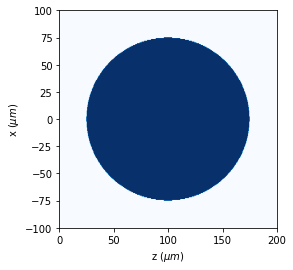

In [19]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.cylinder(
    r0=(0, 100 * um), radius=(75 * um, 75 * um), refractive_index=1.5, angle=0 * degrees
)

t1.draw_refractive_index(scale="scaled")

## semi sphere

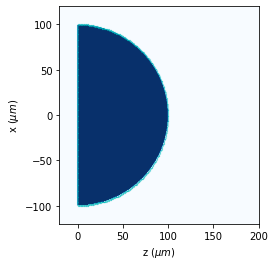

In [20]:
x0 = np.linspace(-120 * um, 120 * um, 256)
z0 = np.linspace(-20 * um, 200 * um, 512)
wavelength = 0.5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.semi_cylinder(
    r0=(0 * um, 0 * um), radius=100 * um, refractive_index=2, angle=0 * degrees
)

t1.draw_refractive_index(draw_borders=True, min_incr=0.01, scale="scaled")

## wedge

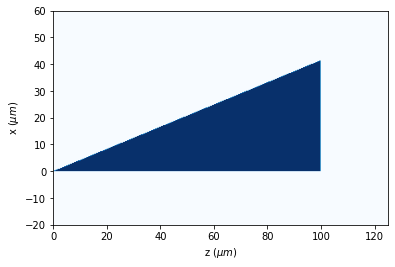

In [21]:
x0 = np.linspace(-20 * um, 60 * um, 256)
z0 = np.linspace(0 * um, 125 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.wedge(
    r0=(0 * um, 0 * um),
    length=100 * um,
    refractive_index=1.5,
    angle_wedge=22.5 * degrees,
    angle=0 * degrees,
    rotation_point=None,
)
t1.draw_refractive_index(scale="scaled")

## prism

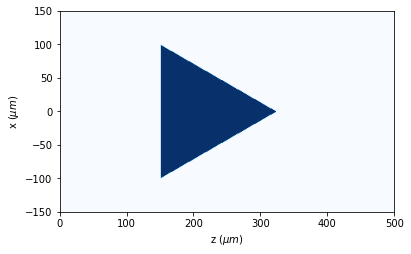

In [22]:
x0 = np.linspace(-150 * um, 150 * um, 256)
z0 = np.linspace(0 * um, 500 * um, 512)
wavelength = 2 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.prism(
    r0=(100 * um, 150 * um),
    length=200 * um,
    refractive_index=2,
    angle_prism=60 * degrees,
    angle=90 * degrees,
)
t1.draw_refractive_index(scale="scaled")

## biprism

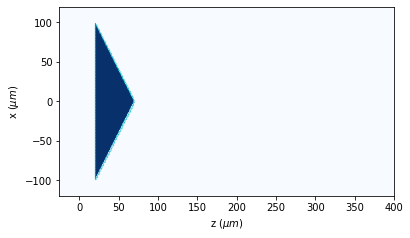

In [23]:
x0 = np.linspace(-120 * um, 120 * um, 256)
z0 = np.linspace(-25 * um, 400 * um, 512)
wavelength = 0.5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.biprism(
    r0=(0, 20 * um), length=200 * um, height=50 * um, refractive_index=1.5, angle=0
)
t1.draw_refractive_index(draw_borders=True, scale="scaled")

## Ronchi grating

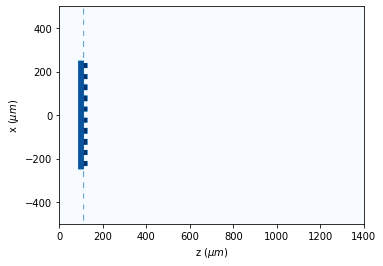

In [24]:
x0 = np.linspace(-500 * um, 500 * um, 256)
z0 = np.linspace(0 * um, 1400 * um, 512)
wavelength = 0.5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.ronchi_grating(
    period=50 * um,
    fill_factor=0.5,
    length=500 * um,
    height=20 * um,
    r0=(0 * um, 100 * um),
    Dx=2 * um,
    refractive_index=1.5 + 0.5j,
    heigth_substrate=25 * um,
    refractive_index_substrate=1.5,
    angle=0 * degrees,
)

t1.draw_refractive_index(scale="scaled")

## grating with substrate

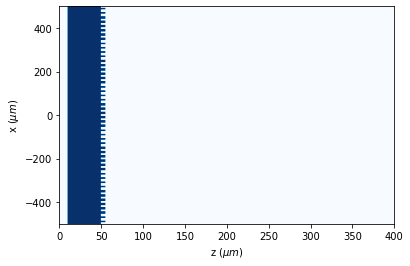

In [25]:
x0 = np.linspace(-500 * um, 500 * um, 256)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 0.55 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=0 * um)

t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.ronchi_grating(period=20 * um, x0=0 * um, fill_factor=0.5)

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t2.extrude_mask(t=t0, z0=10 * um, z1=50 * um, refractive_index=1.5)
t2.extrude_mask(t=t1, z0=50 * um, z1=55.5 * um, refractive_index=1.5)

t2.draw_refractive_index(draw_borders=False)

## sine grating

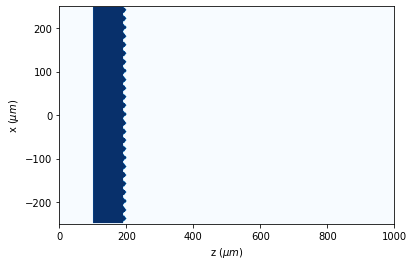

In [26]:
x0 = np.linspace(-250 * um, 250 * um, 256)
z0 = np.linspace(0 * um, 1000 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.sine_grating(
    period=20 * um,
    heigth_sine=10 * um,
    heigth_substrate=100 * um,
    r0=(0 * um, 100 * um),
    length=500 * um,
    Dx=2 * um,
    refractive_index=1.5,
    angle=0 * degrees,
)

t1.draw_refractive_index()

## probe

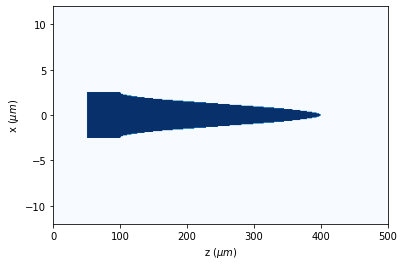

In [27]:
x0 = np.linspace(-12 * um, 12 * um, 256)
z0 = np.linspace(0 * um, 500 * um, 512)
wavelength = 0.6 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.probe(
    r0=(0, 50 * um),
    base=5 * um,
    length=300 * um,
    refractive_index=1.5,
    angle=0 * degrees,
)

t1.draw_refractive_index()

## Aspheric lens

Theoretical image focal distance f' = 0.73 mm


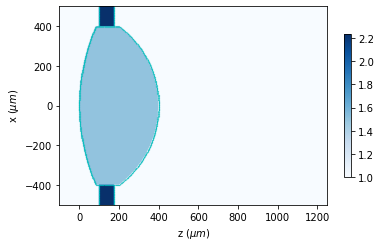

In [44]:
x0 = np.linspace(-500 * um, 500 * um, 512)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 512)
wavelength = 5 * um

lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info="")
focal, ipasa = lens.aspheric_lens(
    r0=(0 * um, 0 * um),
    angle=(0 * degrees, (0 * um, 0 * um)),
    refractive_index=1.5,
    cx=(1 / (1 * mm), -1 / (0.5 * mm)),
    Qx=(0, 0),
    a2=(0, 1e-12),
    a3=(0, 0),
    a4=(0, 0),
    thickness=0.4 * mm,
    size=0.8 * mm,
)

lens.slit(r0=(0, 100 * um), aperture=800 * um, depth=75 * um, refractive_index=1 + 2j)

print("Theoretical image focal distance f' = {:2.2f} mm".format(focal/mm))

lens.draw_refractive_index(
    draw_borders=True, min_incr=0.01, colorbar_kind="vertical", scale='scaled'
)

## Lenses with different curvatures

Theoretical image focal distance f' = 1.03 mm


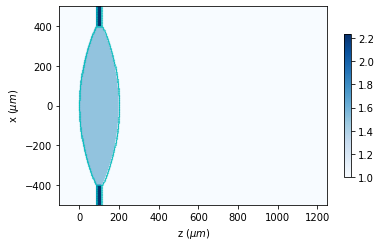

In [43]:
x0 = np.linspace(-500 * um, 500 * um, 512)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 512)
wavelength = 5 * um

lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info="")
focal, ipasa = lens.aspheric_lens(
    r0=(0 * um, 0 * um),
    angle=(0 * degrees, (0 * um, 0 * um)),
    refractive_index=1.5,
    cx=(1 / (1 * mm), -1 / (1 * mm)),
    thickness=0.2 * mm,
    size=0.8 * mm,
)

lens.slit(r0=(0, 100 * um -25*um/2), aperture=800 * um, depth=25 * um, refractive_index=1 + 2j)

print("Theoretical image focal distance f' = {:2.2f} mm".format(focal/mm))


lens.draw_refractive_index(
    draw_borders=True, min_incr=0.01, colorbar_kind="vertical", scale='scaled'
)

Theoretical image focal distance f' = 60.00 mm


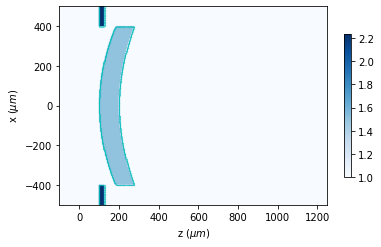

In [42]:
x0 = np.linspace(-500 * um, 500 * um, 512)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 512)
wavelength = 5 * um

lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info="")
focal, ipasa = lens.aspheric_lens(
    r0=(0 * um, 100 * um),
    angle=(0 * degrees, (0 * um, 0 * um)),
    refractive_index=1.5,
    cx=(1 / (1 * mm), 1 / (1 * mm)),
    thickness=0.1 * mm,
    size=0.8 * mm,
)

lens.slit(r0=(0, 100 * um), aperture=800 * um, depth=25 * um, refractive_index=1 + 2j)

print("Theoretical image focal distance f' = {:2.2f} mm".format(focal/mm))


lens.draw_refractive_index(
    draw_borders=True, min_incr=0.01, colorbar_kind="vertical", scale='scaled'
)

Theoretical image focal distance f' = 2.00 mm


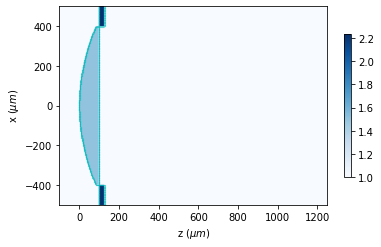

In [41]:
x0 = np.linspace(-500 * um, 500 * um, 512)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 512)
wavelength = 5 * um

lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info="")
focal, ipasa = lens.aspheric_lens(
    r0=(0 * um, 0 * um),
    angle=(0 * degrees, (0 * um, 0 * um)),
    refractive_index=1.5,
    cx=(1 / (1 * mm), 0),
    thickness=0.1 * mm,
    size=0.8 * mm,
)

lens.slit(r0=(0, 100 * um), aperture=800 * um, depth=25 * um, refractive_index=1 + 2j)

print("Theoretical image focal distance f' = {:2.2f} mm".format(focal/mm))

lens.draw_refractive_index(
    draw_borders=True, min_incr=0.01, colorbar_kind="vertical", scale='scaled'
)

<string>:1: RuntimeWarning: invalid value encountered in sqrt


Theoretical image focal distance f' = 0.60 mm


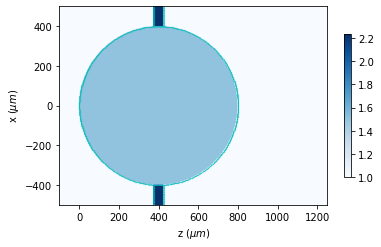

In [39]:
x0 = np.linspace(-500 * um, 500 * um, 512)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 512)
wavelength = 5 * um

radius = 400*um

lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info="")
focal, ipasa = lens.aspheric_lens(
    r0=(0 * um, 0 * um),
    angle=(0 * degrees, (0 * um, 0 * um)),
    refractive_index=1.5,
    cx=(1 / (radius), -1 / (radius)),
    thickness=2*radius,
    size=2*radius,
)

lens.slit(r0=(0, radius-25*um), aperture=800 * um, depth=50 * um, refractive_index=1 + 2j)

print("Theoretical image focal distance f' = {:2.2f} mm".format(focal/mm))


lens.draw_refractive_index(
    draw_borders=True, min_incr=0.01, colorbar_kind="vertical", scale='scaled'
)

Theoretical image focal distance f' = -0.98 mm


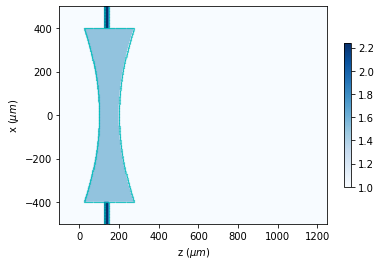

In [37]:
x0 = np.linspace(-500 * um, 500 * um, 512)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 512)
wavelength = 5 * um

lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info="")
focal, ipasa = lens.aspheric_lens(
    r0=(0 * um, 100 * um),
    angle=(0 * degrees, (0 * um, 0 * um)),
    refractive_index=1.5,
    cx=(-1 / (1 * mm), 1 / (1. * mm)),
    thickness=0.1 * mm,
    size=0.8 * mm,
)

lens.slit(r0=(0, 125 * um), aperture=800 * um, depth=25 * um, refractive_index=1 + 2j)

print("Theoretical image focal distance f' = {:2.2f} mm".format(focal/mm))


lens.draw_refractive_index(
    draw_borders=True, min_incr=0.01, colorbar_kind="vertical"
)

## Simplified lenses, with no aberrations

Theoretical image focal distance f' = 8.93 mm


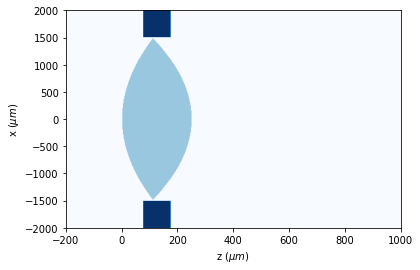

In [36]:
x0 = np.linspace(-2 * mm, 2 * mm, 512)
z0 = np.linspace(-200 * um, 1 * mm, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

focal, _ = t1.lens(
    r0=(0 * um, 0 * um),
    size=3 * mm,
    radii=(10* mm, -8 * mm),
    thickness=.25* mm,
    refractive_index=1.5,
    angle=0 * degrees,
    mask=(100 * um, 1 + 2.05j),
)

print("Theoretical image focal distance f' = {:2.2f} mm".format(focal/mm))

t1.draw_refractive_index()

Theoretical image focal distance f' = 1.04 mm


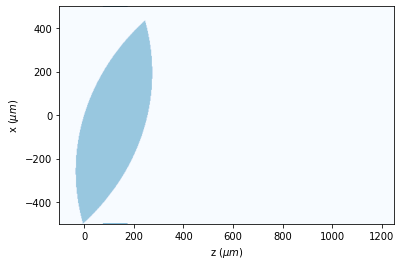

In [47]:
x0 = np.linspace(-500 * um, 500 * um, 512)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 512)
wavelength = 5 * um


t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

focal, _ = t1.lens(
    r0=(0 * um, 0 * um),
    size=1 * mm,
    radii=(1* mm, -1 * mm),
    thickness=.25* mm,
    refractive_index=1.5,
    angle=15 * degrees,
    mask=(100 * um, 1 + 2.05j),
)

print("Theoretical image focal distance f' = {:2.2f} mm".format(focal/mm))

t1.draw_refractive_index()

## rough surface

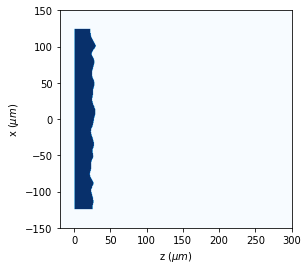

In [34]:
x0 = np.linspace(-150 * um, 150 * um, 256)
z0 = np.linspace(-20 * um, 300 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.rough_sheet(
    r0=(0 * um, 0 * um),
    size=(250 * um, 25 * um),
    t=10 * um,
    s=10 * um,
    refractive_index=1.5,
    angle=0,
    rotation_point=None,
)
t1.draw_refractive_index(scale="scaled")